In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from scipy import signal
import random

import h5py
from IPython.utils import io

In [2]:
%matplotlib notebook

In [3]:
import sys
sys.path.append('../../../../nadavp/new_trap/Tools/')
sys.path.append('../../../../nadavp/new_trap/Tools/StatFramework/')
import BeadDataFile
from discharge_tools import *

In [4]:
from likelihood_calculator import likelihood_analyser
from likelihood_calculator import GravityFramework
from likelihood_calculator import auxiliary_functions as aux
gfw = GravityFramework.GravityFramework()

sys.path.append('/home/analysis_user/New_trap_code/SensitivityFramework/')
from signal_model_utilities import *

In [5]:
%reload_ext autoreload
%autoreload 2

In [14]:
# bdf_mass = load_dir(dirname='/data/new_trap/20200518/Bead2/Mass0519/', file_prefix='Mass')
# bdf_discharge = load_dir(dirname='/data/new_trap/20200518/Bead2/Discharge/Discharge0519/', file_prefix='Discharge')
bdf_discharge2 = load_dir(dirname='/data/new_trap/20200518/Bead2/Discharge/Discharge0518/', start_file=225, max_file=10, file_prefix='Discharge')

241  files in folder
10  files loaded


In [7]:
file_i = np.array([int(bb.fname.split('_')[-1].split('.')[0]) for bb in bdf_discharge])

In [19]:
amps2 = [m2_.values[0]/scale/extra_scale for m2_ in m2]
print(amps2)

[19.82816541657124, 20.069807757540197, 18.873672511977794, 19.997276382604994, 18.425758920287112, 19.34289493230953, 2.1351190570831773, 4.428100193155934, 1.430762854041342, 1.720788359030289]


In [15]:
m2 = gfw.build_z_response(bdf_discharge2, drive_freq=71, charges=10, bandwidth=1, decimate=10, bimodal=False)

***************************************************
Z2-amplitude:  1.00e+03
reduced chi2:  1508.6831800781806
***************************************************
Z2-amplitude:  1.01e+03
reduced chi2:  14004.19166629719
***************************************************
Z2-amplitude:  9.52e+02
reduced chi2:  40050.95256005471
***************************************************
Z2-amplitude:  1.01e+03
reduced chi2:  32963.175655425104
***************************************************
Z2-amplitude:  9.29e+02
reduced chi2:  21434.0691123695
***************************************************
Z2-amplitude:  9.76e+02
reduced chi2:  54108.34193010822
***************************************************
Z2-amplitude:  1.08e+02
reduced chi2:  9583.098841329831
***************************************************
Z2-amplitude:  2.23e+02
reduced chi2:  17494.092379310452
***************************************************
Z2-amplitude:  7.22e+01
reduced chi2:  35883.792006240605
****************

In [11]:
# phases = np.array([m_.values[2] for m_ in m1])
amps = np.array([m_.values[0] for m_ in m1])

<IPython.core.display.Javascript object>


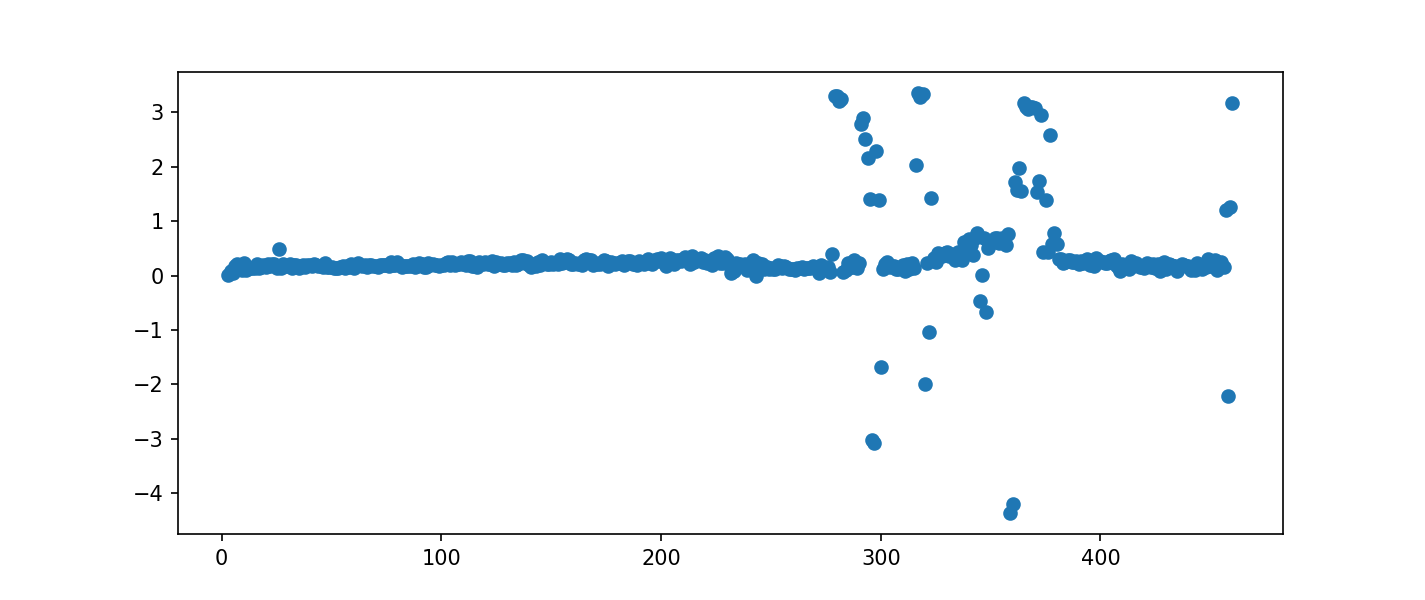

In [124]:
_,ax = plt.subplots(figsize=(9.5, 4))
ax.scatter(file_i, phases)

<IPython.core.display.Javascript object>


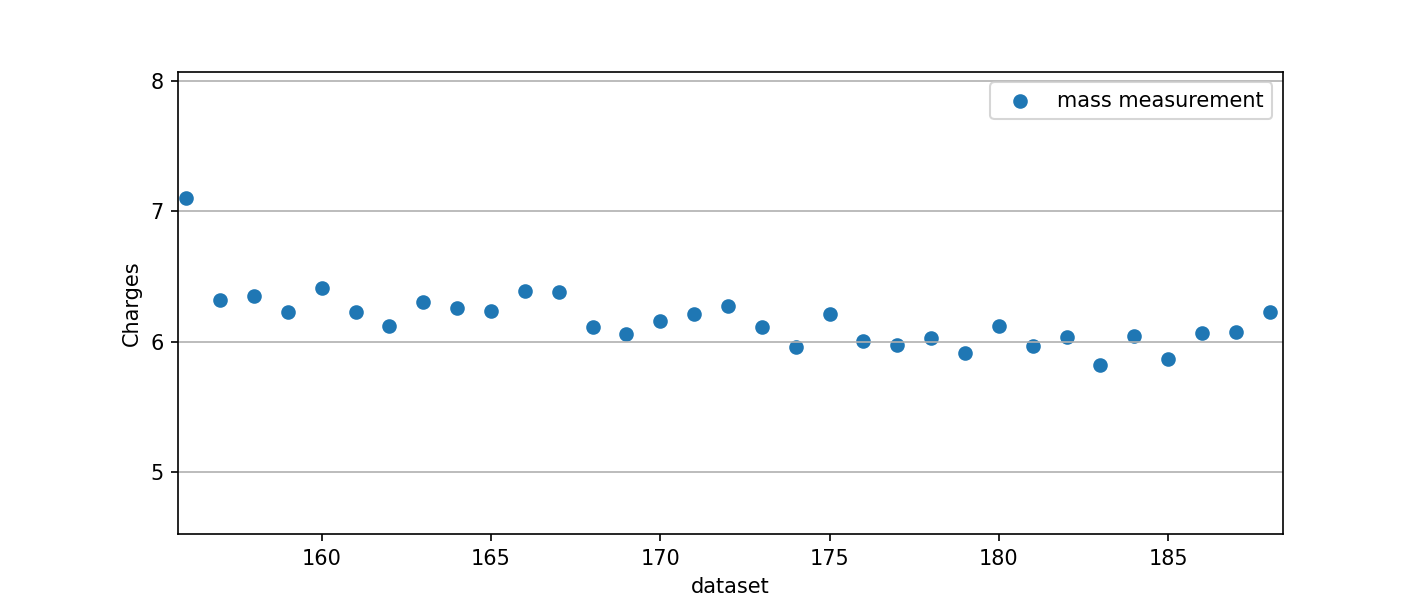

In [13]:
_,ax = plt.subplots(figsize=(9.5,4))
scale = 45.85
extra_scale = 1.1

# Mass
ax.scatter(file_i, amps/scale/extra_scale, label='mass measurement')

ax.legend()
ax.set(xlabel='dataset', xlim=(3,319), ylabel='Charges', ylim=(None,None))
ax.grid(axis='y')
ax.legend()
from matplotlib.ticker import MaxNLocator
ax.yaxis.set_major_locator(MaxNLocator(integer=True))

<IPython.core.display.Javascript object>


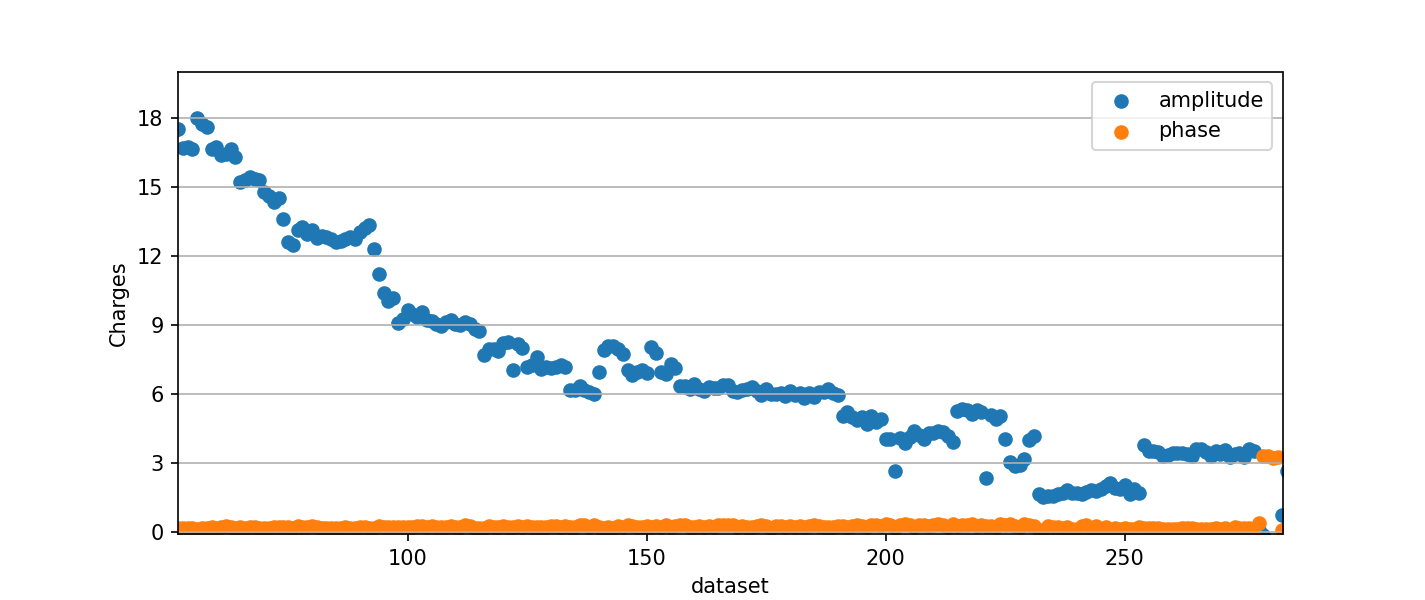

In [150]:
_,ax = plt.subplots(figsize=(9.5,4))
scale = 45.85
extra_scale = 1.

# Mass
ax.scatter(file_i, amps/scale/1.1, label='amplitude')
ax.scatter(file_i, phases, label='phase')

ax.legend()
ax.set(xlabel='dataset', xlim=(52,283), ylabel='Charges', ylim=(-0.1,20))
ax.grid(axis='y')
ax.legend()
from matplotlib.ticker import MaxNLocator
ax.yaxis.set_major_locator(MaxNLocator(integer=True))

In [15]:
bb = bdf_mass[-2]
charges = 17
voltage = 3.9
force = charges * 1.6e-19 * 2 * voltage * 50 / 8.6e-3 * 0.63  # in Newtons
bb.fname

'/data/new_trap/20200518/Bead2/Mass0519/Mass_46.h5'

In [16]:
bb.fname

'/data/new_trap/20200518/Bead2/Mass0519/Mass_46.h5'

<IPython.core.display.Javascript object>


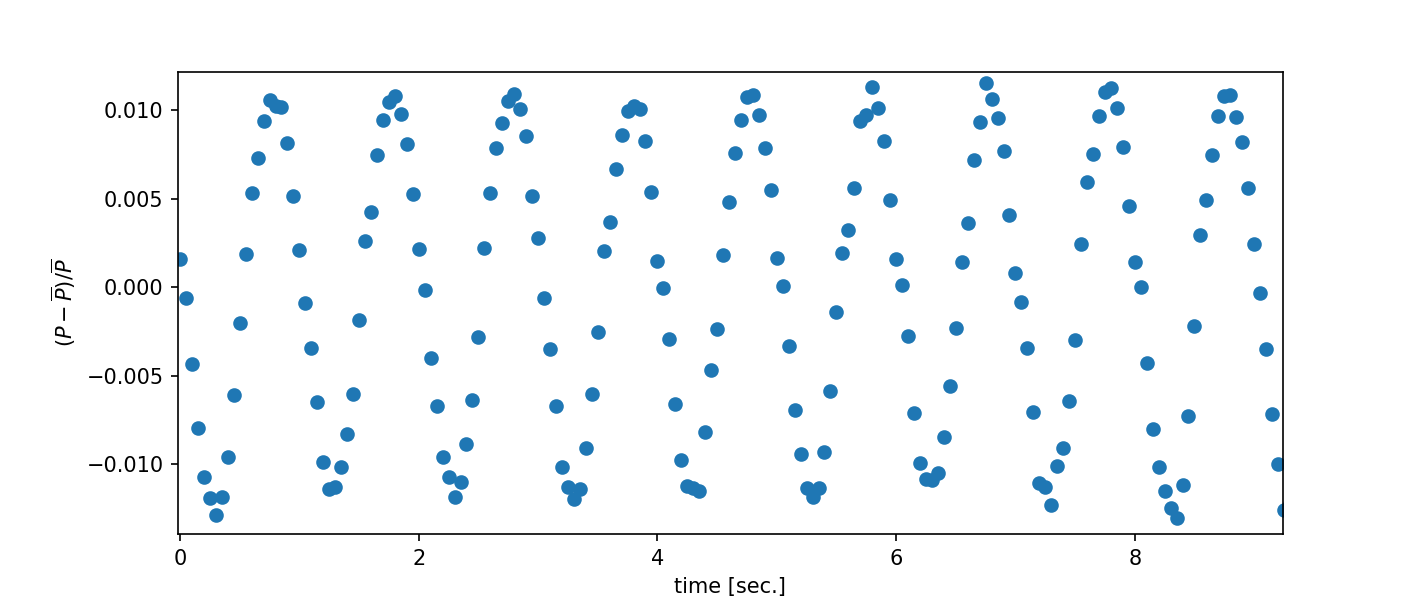

mass in pg:  614.4276818865309
power decrease [%] (peak to valley):  2.5811233250316614
force:  7.770976744186046e-14


In [18]:
nroll = 0
ff = np.roll(np.mean(bb.Iz.reshape(1000,-1), axis=1), nroll)
_, ax = plt.subplots(figsize=(9.5,4))
ax.scatter(np.arange(1000)*1/20, (ff-np.mean(ff))/np.mean(ff))
# ax.scatter(range(500), (sig-np.mean(sig))/np.std(sig))
ax.set(ylabel=r'$(P-\overline{P})/\overline{P}$', xlabel='time [sec.]')
print('mass in pg: ', 2*np.mean(ff)/(np.min(ff)-np.max(ff))*force/9.8*1e15) 
print('power decrease [%] (peak to valley): ', 100*(np.min(ff)-np.max(ff))/np.mean(ff))
print('force: ', force)

In [173]:
# bb.Iz.shape, 250000/1000, 5000/250
get_mass(bb, charges=17)

[668.3292398032712,
 634.8445380432096,
 637.7833628181003,
 665.2048977497831,
 671.8243224112738,
 646.1113001333664,
 607.8323956875735,
 668.0943305810074,
 619.7973751390062,
 582.3239918981004]

In [172]:
from scipy.optimize import leastsq
## assuming 1Hz, 10V amplitude
def get_mass(bb, charges):
    ff = np.mean(bb.Iz.reshape(500,-1), axis=1)
    force = charges * 1.6e-19 * 2* 50 * voltage / 8.6e-3 * 0.63  # in Newtons
    masses = []
    for i in range(10):
        subset = ff[i*50:(i+1)*50]
        masses.append(2*np.mean(subset)/(np.min(subset)-np.max(subset))*force/9.8*1e15)
    return masses

def get_mass2(bb, charges):
    force = charges * 1.6e-19 * 2 * 50 * voltage / 8e-3 * 0.63  # in Newtons
    data = np.mean(bb.Iz.reshape(250000,-1), axis=1)
    data = data/np.mean(data)
    t = np.arange(len(data))*1/5000.

    optimize_func = lambda x: x[0]*np.sin(2*np.pi*t*[1]+x[2])+x[3] - data
    est_amp, est_freq, est_phase, est_shift = leastsq(optimize_func, [0.1, 1, 0.2,1])[0]
    print(est_amp, est_freq, est_phase, est_shift)
    return -1/est_amp*force/9.8*1e15

In [103]:
charges = 17
mass_mean = [np.mean(get_mass(bb, charges=charges)) for bb in bdf_mass[-6:-1]]
mass_std = [np.std(get_mass(bb, charges=charges)) for bb in bdf_mass[-6:-1]]

In [104]:
# bb = bdf_mass[-2]
# get_mass(bb, charges=charges)
mass_mean, mass_std

([601.0687959673111,
  603.1478458141821,
  605.2709593012586,
  612.0934379076971,
  601.6660068054352],
 [16.20415375913166,
  21.5118001894934,
  21.59044547594043,
  18.915151105443886,
  20.983025151059962])

<IPython.core.display.Javascript object>


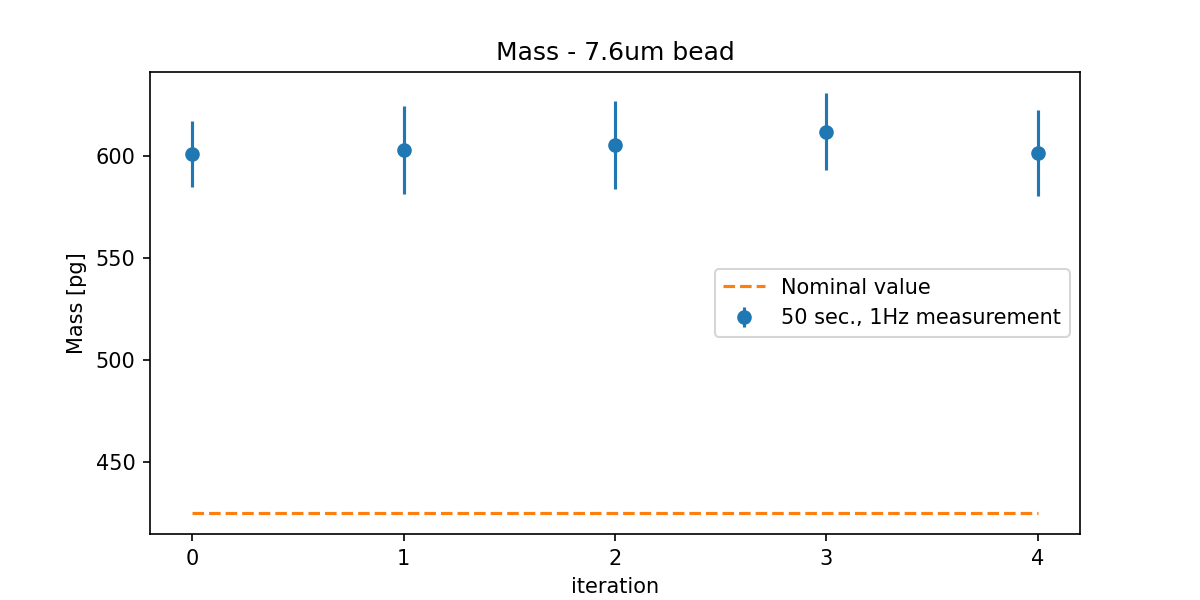

In [91]:
from matplotlib.ticker import MaxNLocator

_,ax = plt.subplots(figsize=(8,4))
ax.errorbar(range(5), mass_mean, yerr=mass_std/np.sqrt(1), fmt='o', label='50 sec., 1Hz measurement')
ax.plot(range(5), np.arange(5)*0+425, '--', label='Nominal value')
ax.legend()
ax.set(title='Mass - 7.6um bead', ylabel='Mass [pg]', xlabel='iteration')
ax.xaxis.set_major_locator(MaxNLocator(integer=True))

In [101]:
charges = 17
[get_mass2(bb, charges=charges) for bb in bdf_mass[-6:-1]]
# bdf_mass[-6].fname

0.011301076512280777 1.0 1.5027618751641763 1.0
-0.011363514735707032 1.0 -0.3428077698194489 0.9999999999999734
-0.011292613500300884 1.0 -0.3596224862327241 1.0
-0.01123814222726135 1.0 -0.36661635620263505 0.9999999999999968
-0.01131111389848724 1.0 -0.3831832078823573 0.9999999999999882


[-754.2897090398822,
 750.1451718542905,
 754.8549956180286,
 758.5137776248821,
 753.6203587717173]